In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.analysis.graph_generator import VisualizationCreator

In [2]:
def plot_distribution(df,column):
    VisualizationCreator(df).dist_plot(column)

In [3]:
df = pd.read_csv('src/db/supermarket_sales.csv')
graph = VisualizationCreator(df)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


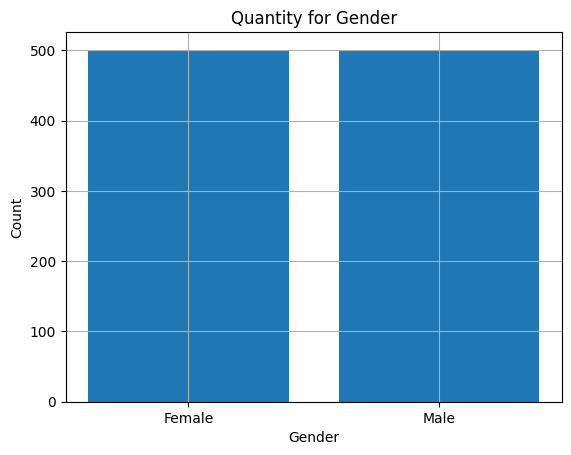

In [8]:
graph.categorical_box('Gender')

In [9]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [30]:
d = {}
for i in df['Product line'].unique():
    d[i] = list(df[df['Product line'] == i]['Unit price'].describe())
teste = pd.DataFrame(d,index=list(df['Unit price'].describe().index))

In [11]:
grouped_stats = df.groupby('Product line')['Unit price'].describe()


In [12]:
grouped_stats

,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,170.0,53.551588,26.748102,10.56,27.9825,51.505,75.9025,99.73
Fashion accessories,178.0,57.153652,26.666294,10.18,35.5200,55.090,81.1025,99.89
Food and beverages,174.0,56.008851,26.270242,10.13,33.4675,53.995,78.7375,99.79
Health and beauty,152.0,54.854474,26.353058,10.08,32.4250,57.405,76.1350,99.96
Home and lifestyle,160.0,55.316937,26.206963,10.53,34.3125,55.590,77.5225,99.92
Sports and travel,166.0,56.993253,26.905015,10.17,34.4175,58.650,80.6800,99.96


In [68]:
# Criar a tabela de contingência
payment_preference = pd.crosstab(df['Product line'], df['Payment'])

In [69]:
payment_preference['total'] = payment_preference.sum(axis=1)
#Porcentagem de tipo pagamento por produto
payment_por = payment_preference.loc[:, payment_preference.columns != 'total'].div(payment_preference['total'], axis=0)*100
payment_por = payment_por.rename(columns={col: col + '%' for col in payment_por.columns})

In [70]:
payment_por
# Aparentemente nenhuma preferencia pelo tipo de pagamento pra cd tipo de produto, podemos ver uma lve preferencia em usar o dinheiro 
#para comprar Electronic accessories e  uma leve preferencia em usar o carteira digital para compras Home and lifestyle	
#Mas como temos pouco dados é arriscado afirmar essa preferencia, devemos supor que não existe preferencia, mas é sugerível  
# Pensar uma promoçoes  do tipo: Compre produtos da linha Home and lifestyle	com a  carteira digital e ganhe desconto

Payment,Cash%,Credit card%,Ewallet%
Product line,,,
Electronic accessories,41.764706,27.058824,31.176471
Fashion accessories,32.022472,31.460674,36.516854
Food and beverages,32.758621,35.057471,32.183908
Health and beauty,32.236842,32.894737,34.868421
Home and lifestyle,31.875000,28.125000,40.000000
Sports and travel,35.542169,31.927711,32.530120


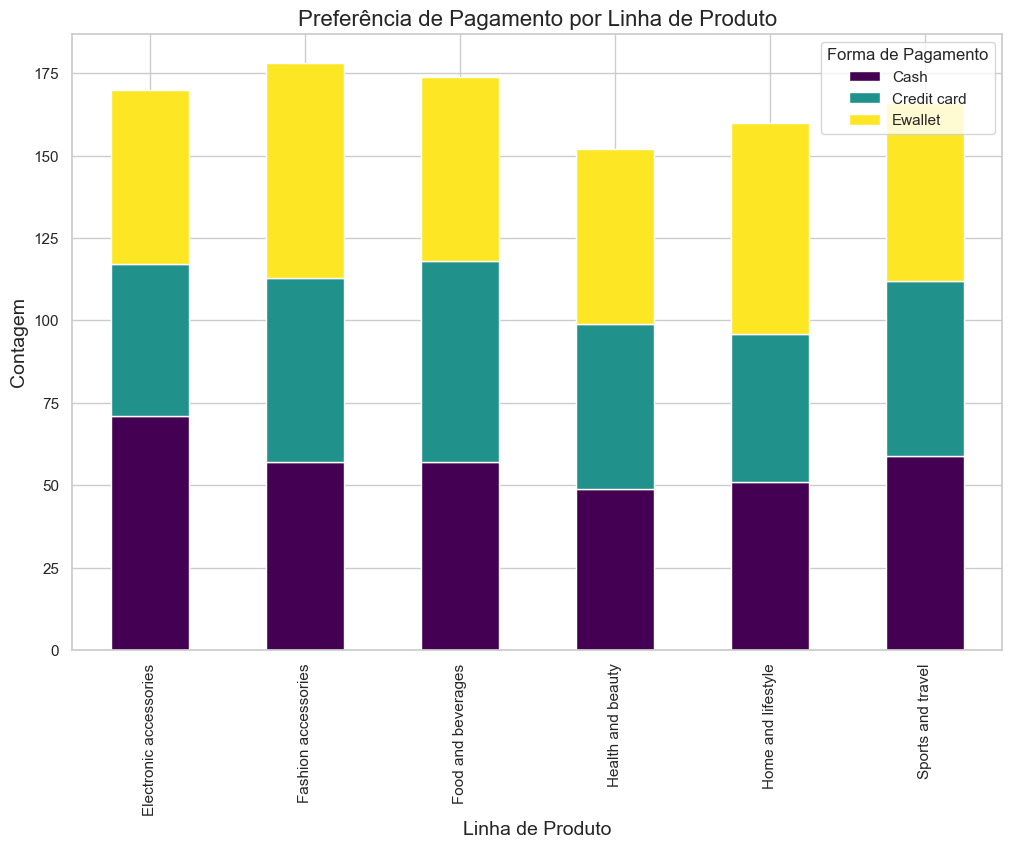

In [45]:
# Plotar gráfico de barras empilhadas
payment_preference.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Adicionar título e rótulos
plt.title('Preferência de Pagamento por Linha de Produto', fontsize=16)
plt.xlabel('Linha de Produto', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Forma de Pagamento')
plt.show()

### Compra 


In [13]:
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

In [14]:
male_group = male.groupby('Product line')['Unit price'].describe()
fame_group = female.groupby('Product line')['Unit price'].describe()

In [15]:
male_group

,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,86.0,55.016744,27.335198,10.56,27.5875,56.950,78.1625,99.55
Fashion accessories,82.0,59.058049,26.195549,12.78,39.5600,56.270,82.7575,99.89
Food and beverages,84.0,51.635833,25.596699,10.13,30.7425,48.995,72.5575,99.79
Health and beauty,88.0,57.592841,25.271874,10.08,39.6850,59.360,75.7750,99.96
Home and lifestyle,81.0,53.438889,24.172803,13.59,33.9900,53.440,71.8600,99.92
Sports and travel,78.0,59.955897,25.768658,10.17,38.6075,63.940,79.6400,99.96


In [16]:
fame_group

,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,84.0,52.051548,26.211872,10.59,28.8325,47.300,74.7975,99.73
Fashion accessories,96.0,55.526979,27.092237,10.18,31.4525,54.295,80.0150,99.30
Food and beverages,90.0,60.090333,26.373560,10.96,38.8075,60.095,80.9975,99.69
Health and beauty,64.0,51.089219,27.526533,10.16,26.6325,51.315,76.9225,99.71
Home and lifestyle,79.0,57.242532,28.165585,10.53,34.4200,60.870,82.6050,97.38
Sports and travel,88.0,54.367273,27.754856,11.85,29.5125,50.505,81.4925,98.80


In [17]:
male.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,56.081944,5.292585,14.799487,310.789226,295.989739,4.761905,14.799487,6.980962
std,25.794145,2.947084,11.524844,242.021730,230.496886,0.000000,11.524844,1.682146
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,33.825000,3.000000,5.616500,117.946500,112.330000,4.761905,5.616500,5.600000
50%,56.500000,5.000000,11.630000,244.230000,232.600000,4.761905,11.630000,6.900000
75%,76.670000,8.000000,21.754000,456.834000,435.080000,4.761905,21.754000,8.450000
max,99.960000,10.000000,49.490000,1039.290000,989.800000,4.761905,49.490000,10.000000


In [18]:
female.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,55.263952,5.726547,15.956936,335.095659,319.138723,4.761905,15.956936,6.964471
std,27.194037,2.886360,11.872591,249.324401,237.451811,0.000000,11.872591,1.755761
min,10.160000,1.000000,0.604500,12.694500,12.090000,4.761905,0.604500,4.000000
25%,30.620000,3.000000,6.322000,132.762000,126.440000,4.761905,6.322000,5.400000
50%,54.070000,6.000000,12.980000,272.580000,259.600000,4.761905,12.980000,7.100000
75%,78.880000,8.000000,23.164000,486.444000,463.280000,4.761905,23.164000,8.500000
max,99.730000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


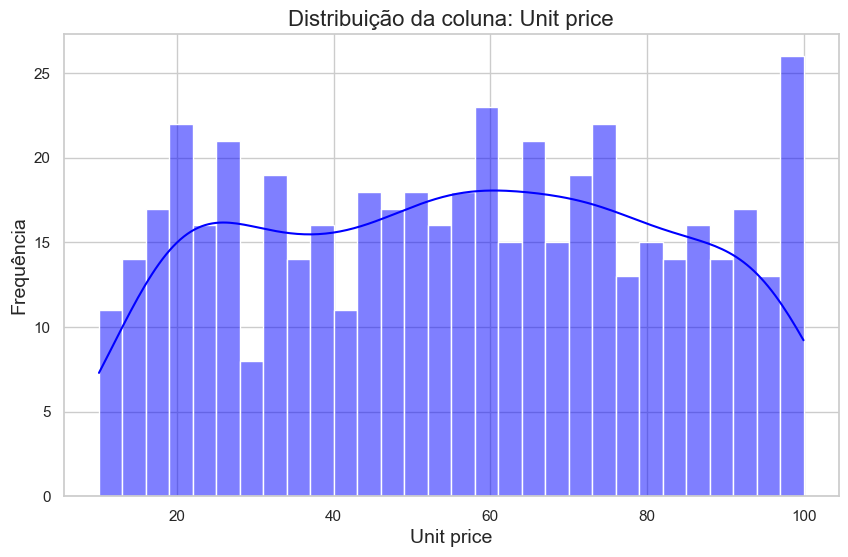

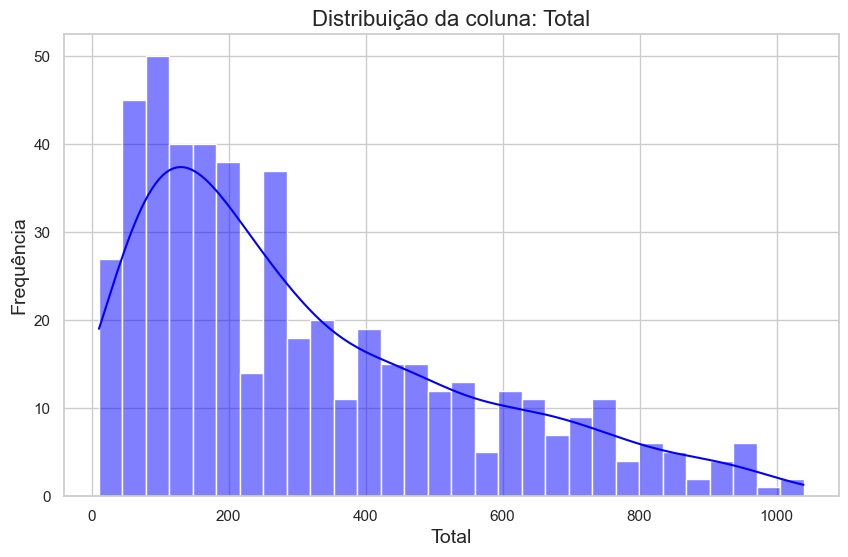

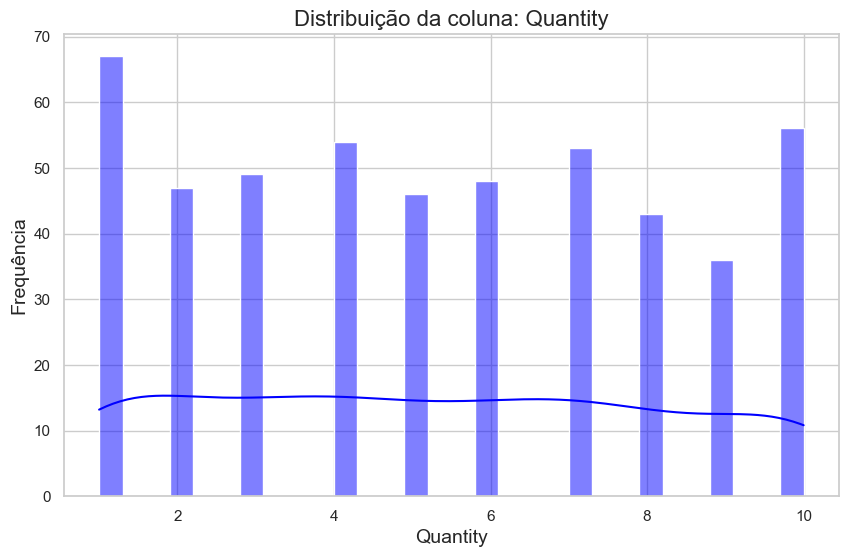

In [25]:
plot_distribution(male,'Unit price')
plot_distribution(male,'Total')
plot_distribution(male,'Quantity')

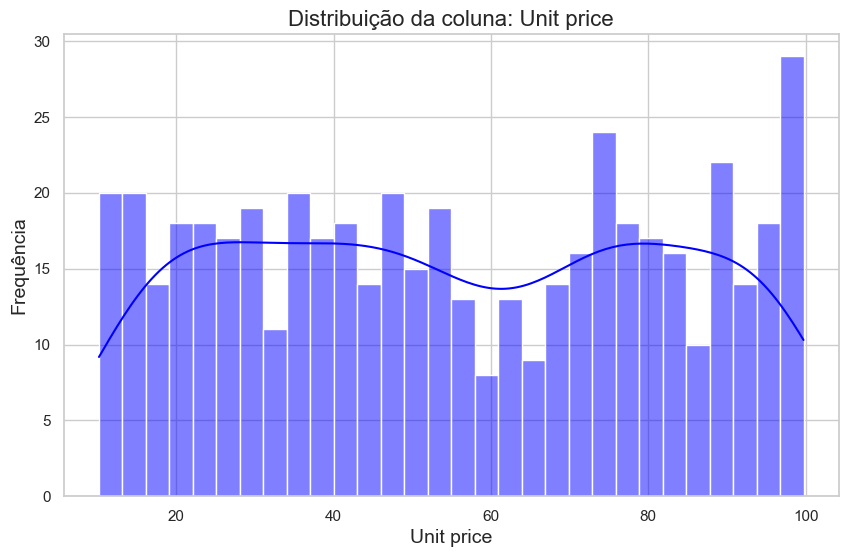

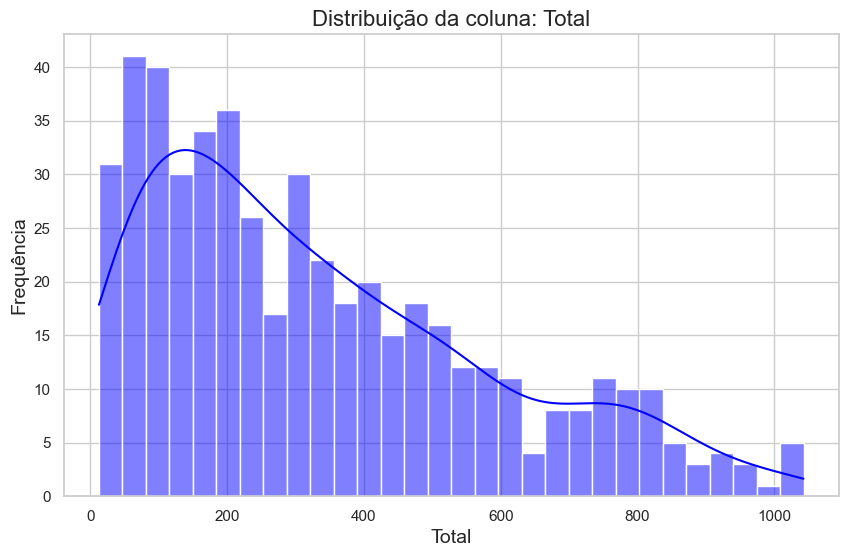

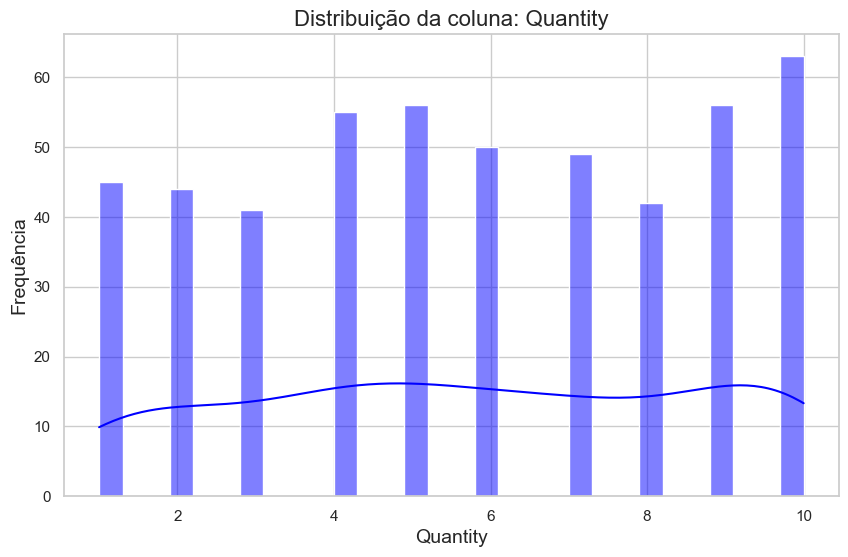

(None,)

In [26]:
plot_distribution(female,'Unit price')
plot_distribution(female,'Total')
plot_distribution(female,'Quantity'),

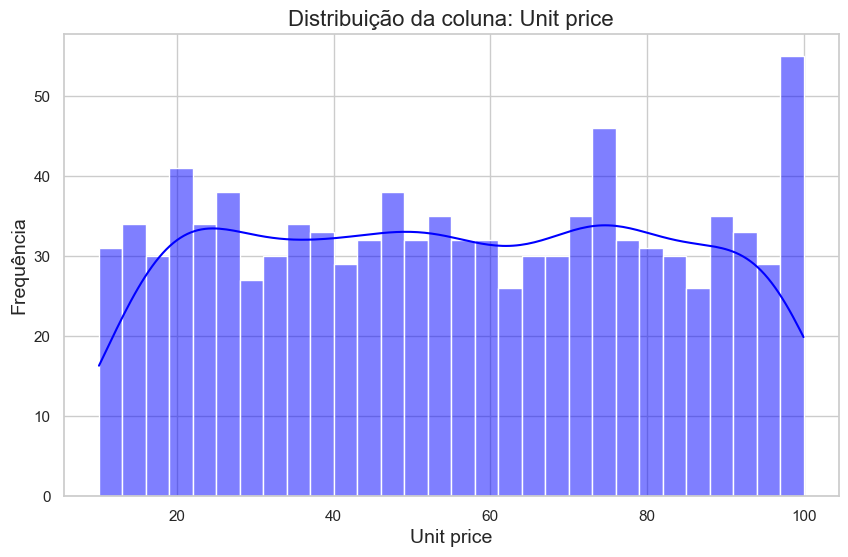

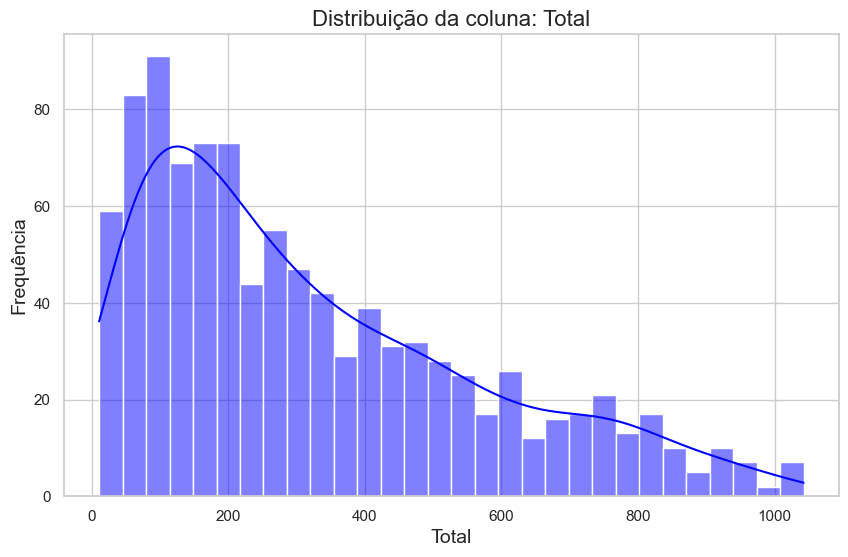

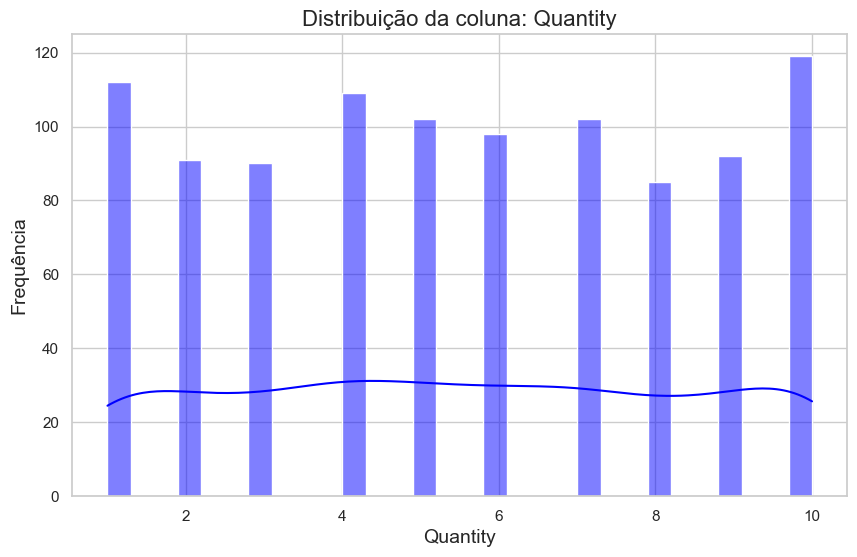

In [24]:
graph.dist_plot('Unit price')
graph.dist_plot('Total')
graph.dist_plot('Quantity')

O preço unitário é distribuído de maneira relativamente uniforme. Por outro lado, a distribuição do preço total se assemelha à distribuição de renda em uma sociedade